**Overview**

Goal is to use a collection of Drones/UAVs to locate an RF emitter.

Previous approaches have considered Reinforcement Learning, specifically Q-Learning, to search for the highest received signal strength (RSS) and reward states that move the Drones closer to the highest RSS.

https://ieeexplore.ieee.org/document/9195795

https://ieeexplore.ieee.org/document/9784655

### Questions to Consider:
1. Is multi-agent reinforcement learning (MARL) via Q-learning an effective strategy? How is it effective? 
2. Is MARL better in this approach with RSS values? What if we can do more with those values?
3. How does MARL perform in the presence of noise? Would an additional algorithm improve convergence speed or target localization performance?
4. Are there other MARL strategies to consider?

**Why is this multi agent?**

1. Multiple Agents: The environment simulates multiple drones (agents) that interact with each other and the environment. The number of drones is specified by the num_drones parameter in the DroneEnv class.

2. Observation and Action Spaces per Agent: Each agent (drone) has its own observation space and action space. The observation space represents the signal strength observed by each drone, and the action space represents the possible movements each drone can make.

3. Independent Learning: Each agent maintains its own Q-table (self.q_tables) and updates it independently based on its observations and actions. This allows agents to learn and make decisions independently of each other.

4. Communication: Although not explicitly implemented in this code, communication between agents could be facilitated through shared state or messages exchanged between agents, allowing them to coordinate actions or share information.

5. Interaction with Shared Environment: All agents interact with the same environment (represented by the DroneEnv class) by taking actions and receiving observations and rewards.

6. Decentralized Control: Each agent makes decisions based only on its own observations and rewards, without access to the global state or rewards of other agents, reflecting decentralized control typical of MARL settings.

In summary, this code implements a MARL environment where multiple agents (drones) learn to navigate and achieve a common goal (reaching a target location) while interacting with each other and the environment.

**PettingZoo**: a library for multi-agent environments

**AECEnv**:  a class provided by the pettingzoo library for creating environments for agent-environment interactions

**Gym**: a toolkit for developing and comparing reinforcement learning algorithms

This code performs Q-learning to train the drones to maximize the signal strength and then evaluates the trained drones' trajectories.

In Q-learning, which is a form of reinforcement learning, there is no explicit loss function like you would find in supervised learning. Instead, the algorithm aims to minimize the error between the predicted Q-values and the target Q-values.

The update rule in Q-learning involves adjusting the Q-values towards a target value, which is derived from the Bellman equation. This adjustment is based on the difference between the current estimate of the Q-value (Q(s, a)) and the target value (r + γ * max(Q(s', a'))), where:

r is the immediate reward received after taking action a in state s,
γ is the discount factor,
s' is the next state after taking action a in state s, and
a' is the next action chosen according to the policy.
The loss in Q-learning can be seen as the squared difference between the current Q-value and the target Q-value. However, this loss is not explicitly computed or minimized in the code. Instead, the Q-values are updated iteratively based on this difference to approximate the optimal action-value function.

In summary, while Q-learning involves minimizing the error between the current and target Q-values, it does not have a traditional loss function that is minimized using gradient descent as in supervised learning.

To ensure that the drones are effectively converging on the target and responding appropriately to the reward, you can adjust several aspects of the environment and the learning process. Here are some recommendations:

1. Increase the Number of Training Episodes: Increase the number of training episodes to allow more learning iterations. This will give the drones more opportunities to explore the environment and learn to optimize their actions based on rewards.

2. Adjust the Reward Function: Fine-tune the reward function to provide stronger incentives for drones to move towards regions with higher signal strength. For example, you can scale the reward based on the difference in signal strength before and after the action, or use a different reward shaping technique.

3. Tune Exploration vs. Exploitation: Adjust the exploration-exploitation trade-off in the action selection strategy (e.g., epsilon-greedy, softmax, etc.). This can help ensure that the drones continue to explore new actions while gradually exploiting the learned knowledge.

4. Modify Action Space: Experiment with different action spaces or action granularity to allow the drones to make more precise movements towards the target.

5. Optimize Learning Algorithm: Depending on the complexity of the task and the learning algorithm used (e.g., Q-learning, DQN, etc.), consider fine-tuning hyperparameters such as learning rate, discount factor, etc., to improve convergence speed and performance.

6. Visualize Learning Progress: Plot additional visualizations such as the average reward over time or the average distance of drones from the target. This can help you monitor the learning progress and identify any issues.

By iteratively adjusting these aspects and experimenting with different configurations, you should be able to improve the convergence of drones towards the target and observe noticeable differences between initial and final positions as they respond to the rewards.

There are no gradients explicitly calculated in the Q-learning method used in the provided code. Q-learning is a form of reinforcement learning that does not involve gradient descent or the calculation of gradients.

In Q-learning, the update to the Q-values is done using the Bellman equation, which is based on the principle of dynamic programming. The update rule adjusts the Q-values based on the temporal difference error (the difference between the current estimate and the target estimate of the Q-value).

This update is done iteratively based on the transitions observed in the environment, where the agent interacts with the environment, observes the resulting state and reward, and updates its Q-values accordingly.

Since Q-learning does not involve gradient descent, it does not require the calculation of gradients or backpropagation, which are common in supervised learning methods. Instead, Q-learning focuses on learning from experiences (state-action-reward tuples) to improve its policy iteratively.

The approach in the provided code is "off-policy."

In reinforcement learning, an "on-policy" approach refers to updating the policy based on the actions taken by the same policy. Conversely, an "off-policy" approach updates the policy based on the actions taken by another policy.

In the provided code, the Q-learning algorithm follows an "off-policy" approach because it uses an epsilon-greedy strategy to explore the environment while still learning the optimal policy. During training, the agent selects actions according to an epsilon-greedy policy, which includes both exploration (random actions with a probability epsilon) and exploitation (selecting the action with the highest Q-value with probability 1-epsilon). However, the Q-values are updated using the greedy policy, which selects actions with the highest Q-value. This means that the policy used for action selection (epsilon-greedy) is different from the policy used for updating Q-values (greedy).

This off-policy characteristic allows the agent to explore the environment more effectively while still learning an optimal policy.

## Parameters

**self.metadata = {'render.modes': ['human']}**

You're setting metadata for the environment, specifying the rendering modes available.

In [ ]:
self.action_space = Discrete(5)
self.observation_space = Box(low=0, high=100, shape=(5,), dtype=np.float32)

****

You're defining the action space as a discrete space with 5 actions and the observation space as a continuous Box space with shape (5,).

In "observation_space" you are defining the observation space for your reinforcement learning environment. 

**Box**: This indicates that the observation space is continuous, meaning observations are represented by arrays of continuous values rather than discrete categories.

**low=0**: This specifies the lower bound of the observation space. In this case, all elements of the observation vectors must be greater than or equal to 0.

**high=100**: This specifies the upper bound of the observation space. In this case, all elements of the observation vectors must be less than or equal to 100.

**shape=(5,)**: This specifies the shape of the observation vectors. Each observation will be a one-dimensional array with 5 elements.

**dtype=np.float32**: This specifies the data type of the observation values. In this case, the observation values are represented as 32-bit floating point numbers.

Putting it all together, the observation space for your environment consists of continuous arrays with 5 elements, where each element falls within the range [0, 100]. This definition allows agents to observe continuous states represented by arrays of floating point values.

In [ ]:
self.q_tables = [np.zeros((self.observation_space.shape[0], self.action_space.n)) for _ in range(num_drones)]

You're initializing Q-tables for each drone agent. Each Q-table is a matrix with dimensions (observation_space.shape[0], action_space.n).

In [2]:
self.alpha = 0.1  # Learning rate**
self.gamma = 0.9  # Discount factor**
self.epsilon = 0.1  # Epsilon for epsilon-greedy action selection**


These parameters control the learning process: alpha is the learning rate, gamma is the discount factor, and epsilon is the exploration-exploitation trade-off parameter.

In [ ]:
def observe(self, agent):
    return self.signal_strength[agent]
    


This method allows agents to observe the current signal strength in the environment.

In the **step** method of the **DroneEnv** class, you're defining the behavior of the environment when it receives actions from the agents. Let's go through each parameter of this method:

**action**: This parameter represents the actions taken by the agents in the environment. It's a list where each element corresponds to the action chosen by one agent.
Inside the method:

**self.current_step += 1**: This line increments the current step count of the environment by 1, indicating the progress of the simulation.

**movements**: This variable is an array that defines the possible movements that each agent can make in response to its action. Each row of this array represents a possible movement, where the first column indicates the change in the x-coordinate and the second column indicates the change in the y-coordinate.

**distances_before_action**: This variable calculates the distances between the drones and the target location before the agents take their actions. It's an array where each element represents the distance of one drone to the target.

**power_before**: This variable initializes an array to store the signal strength (received power) of each drone before they take their actions.

The first loop calculates the received power for each drone before they take their actions and stores it in the power_before array.

The second loop applies the actions chosen by the agents to update the locations of the drones.

**distances_after_action**: This variable calculates the distances between the drones and the target location after the agents have taken their actions.

**power_after**: This variable initializes an array to store the signal strength (received power) of each drone after they have taken their actions.

The third loop calculates the received power for each drone after they have taken their actions and stores it in the power_after array.

**rewards**: This variable calculates the rewards obtained by the agents based on the change in signal strength (received power) after taking their actions. If the signal strength increases, the agent receives a reward of 1; otherwise, it receives a reward of -1.

**done**: This variable indicates whether the episode is finished or not. In this case, the episode is considered finished if the current step count exceeds the maximum number of steps allowed.

Finally, the method returns the new observation (signal strength), rewards, whether the episode is done, and additional information (empty dictionary) to be used by the agents.

In [4]:
#!pip install pettingzoo
#!pip install gym


In [9]:
# Import Necessary Functions
import numpy as np
import matplotlib.pyplot as plt
from pettingzoo import AECEnv
from gym.spaces import Discrete, Box
from itertools import combinations

LOCA Algorithm (Ralph Schmidt, 1972, https://ieeexplore.ieee.org/document/4103057) is below

In [200]:
# This LOCA Function enumerates all solutions - assuming at least 4 sensors for 2D

def LOCAfun_allcombs_2D(P1, S1):
    i_soln = 0
    xyWLS_comb = []
    for pqty in range(4, P1.shape[0] + 1):  # Count number of sensors
        for pmax in range(4, P1.shape[0] + 1):  # Count number of sensors
            prange = np.arange(1, pmax + 1)  # Use entire range of sensors for nchoosek calc
            combels = np.array(list(combinations(prange, pqty)))  # All combs with pqty sensors
            for combqty in range(combels.shape[0]):  # Number of rows in combinations 
                els = combels.shape[1]
                P = np.zeros((els, 2))
                P[0:els, :] = P1[combels[combqty, 0:els] - 1, :]
                S = S1[combels[combqty, 0:els] - 1]

                N = P.shape[0]
                combs = np.math.comb(N, 3)  # N-choose-3

                cl = 3e8
                xis, yis = P[:, 0], P[:, 1]
                sumdijk = np.zeros(combs)
                Am = np.zeros(combs)
                Bm = np.zeros(combs)
                Dm = np.zeros(combs)
                mc = np.zeros((combs, 3))
                ai = np.zeros(N)
                dijk = np.zeros((N, N))

                for i in range(N):
                    ai[i] = np.sqrt(xis[i]**2 + yis[i]**2)
                    for j in range(N):
                        dijk[i, j] = cl * (S[j] - S[i])

                m = 0
                for i in range(N):
                    for j in range(i + 1, N):
                        for k in range(j + 1, N):
                            sumdijk[m] = dijk[i, j] + dijk[j, k] + dijk[k, i]
                            Am[m] = xis[i] * dijk[j, k] + xis[j] * dijk[k, i] + xis[k] * (dijk[i, j] - sumdijk[m])
                            Bm[m] = yis[i] * dijk[j, k] + yis[j] * dijk[k, i] + yis[k] * (dijk[i, j] - sumdijk[m])
                            Dm[m] = 0.5 * (dijk[i, j] * dijk[j, k] * dijk[k, i] + ai[i]**2 * dijk[j, k] +
                                           ai[j]**2 * dijk[k, i] + ai[k]**2 * (dijk[i, j] - sumdijk[m]))
                            mc[m] = [i, j, k]
                            m += 1

                LineAmBmDm = np.column_stack((Am, Bm, Dm))
                lines = LineAmBmDm.shape[0]
                sqWLS = np.zeros(lines)
                AmWLS = np.zeros(lines)
                BmWLS = np.zeros(lines)
                DmWLS = np.zeros(lines)

                for i in range(lines):
                    sqWLS[i] = np.sqrt(Am[i]**2 + Bm[i]**2)
                    AmWLS[i] = Am[i] / sqWLS[i]
                    BmWLS[i] = Bm[i] / sqWLS[i]
                    DmWLS[i] = Dm[i] / sqWLS[i]

                xyWLS = np.linalg.lstsq(np.column_stack((AmWLS, BmWLS)), DmWLS, rcond=None)[0]
                xyWLS_comb.append(xyWLS)
                i_soln += 1
                
    LOCASoln = np.array(xyWLS_comb)
    return LOCASoln


In [209]:
toas = np.linalg.norm(env.target_location - env.initial_loc, axis=1)/(3e8) # Convert Distance to Time

LOCASoln = LOCAfun_allcombs_2D(env.initial_loc, toas)
print('Target Location from LOCA: ', LOCASoln)
locaerr = np.linalg.norm(env.target_location - LOCASoln, axis=1)
print('LOCA Error (m): ', locaerr)

Target Location from LOCA:  [[350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]
 [350. 350.]]
LOCA Error (m):  [2.89845702e-13 2.89845702e-13 1.13686838e-13 3.59509347e-13
 7.43237212e-12 2.84217094e-13 2.89845702e-13 1.13686838e-13
 1.55557912e-11 3.59509347e-13 4.13826336e-13 2.84217094e-13
 7.43237212e-12 1.60777468e-13 1.70530257e-13 1.79754674e-13
 2.84217094e-13 1.27105749e-13 1.70530257e-13 2.89845702e-13
 3.63975473e-13 1.70530257e-13 1.70530257e-13 2.04951861e-13
 8.03887339e-14 1.27105749e-13 1.60777468e-13 1.27105749e-13
 5.68434189e-14]


In [299]:
class DroneEnv(AECEnv):
    def __init__(self, num_drones):
        super().__init__()
        self.width = 500
        self.height = self.width
        self.max_steps = 500
        self.current_step = 0
        self.stdev_rss_err = 15 # StDev for Multipath & Fading contribution in dB
        self.stdev_pos_err = 0.02 # StDev for Positioning Error in m
        self.stdev_time_err = 10e-9 # StDev for Local Timing Inaccuracy in s

        # Currently setting this to fixed value to compare approaches
        self.targ_loc2 = np.array([[350,  350]])
        self.target_location = self.targ_loc2.copy()
        
        # Uncomment this line if we want to vary target from run-to-run
        #self.target_location = np.random.randint(50, self.width, size=(1, 2))

        # Currently setting this to fixed value to compare approaches
        self.num_drones = num_drones
        self.initial_drones_location2 = np.array(([[483, 259], [271, 478],[238,  75],[469, 157], [191, 201], [ 96, 195]]))        
        self.drones_location = np.random.randint(50, self.width, size=(self.num_drones, 2))
        self.initial_loc = self.initial_drones_location2.copy()
        
        # Uncomment this line if we want to vary initial locations from run-to-run
        #self.initial_loc = self.drones_location.copy()
        
        self.target_power = 10
        #print("Drones",self.drones_location)

        power_init = -1 * 20 * np.log10((4 * np.pi * 2*self.width * 5e9) / 3e8) + 10
        self.signal_strength = np.zeros(self.num_drones) + power_init
        self.drone_trajectory = [[] for _ in range(num_drones)]  # List to store trajectories for each drone

        self.metadata = {'render.modes': ['human']}

        self.action_space = Discrete(5)  # Discrete action space
        self.observation_space = Box(low=0, high=self.width, shape=(5,), dtype=np.float32)
        
        # Initialize Q-tables for each agent
        self.q_tables = [np.zeros((self.observation_space.shape[0], self.action_space.n)) for _ in range(num_drones)]
        
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
        self.epsilon = 0.1  # Epsilon for epsilon-greedy action selection
        
        self.loca_soln_avg =  np.random.randint(50, self.width, size=(1, 2))
        
        initial_distances = np.linalg.norm(self.target_location - self.initial_loc, axis=1)
        toas = initial_distances/(3e8) # Convert Distance to Time
        
        drones_location_err = np.zeros((self.num_drones,2))
        
        # Calculate LOCA Estimate
        for i in range(self.num_drones):
            poserr = np.array([[np.random.normal(loc=0, scale = self.stdev_pos_err),np.random.normal(loc=0, scale = self.stdev_pos_err)]])
            drones_location_err[i] = self.initial_loc[i] + poserr # adding error
            toas[i] = toas[i] + abs(np.random.normal(loc=0, scale = self.stdev_time_err))
            
        LOCASoln = LOCAfun_allcombs_2D(drones_location_err, toas)
        self.localization_est = np.average(LOCASoln, axis = 0)
        self.loca_err =  np.linalg.norm(self.localization_est - self.target_location, axis=1)
    

    def observe(self, agent):
        return self.signal_strength[agent]

    def step(self, action):
        #print(action)
        self.current_step += 1
        movements = np.array([[0, 5], [0, -5], [5, 0], [-5, 0], [0, 0]])
        drones_location_err = np.zeros((self.num_drones,2))
        toas = np.zeros(self.num_drones)
       
       # Update drone positions and store trajectories
        for i, act in enumerate(action):
            movement = movements[act]
            self.drones_location[i] += movement
            self.drone_trajectory[i].append(self.drones_location[i].copy()) 
            
        distances_before_action = np.linalg.norm(self.target_location - self.drones_location, axis=1)
        toas = distances_before_action/(3e8) # Convert Distance to Time
        
        # Calculate LOCA Estimate
        for i in range(self.num_drones):
            poserr = np.array([[np.random.normal(loc=0, scale = self.stdev_pos_err),np.random.normal(loc=0, scale = self.stdev_pos_err)]])
            drones_location_err[i] = self.drones_location[i] + poserr # adding error
            toas[i] = toas[i] + abs(np.random.normal(loc=0, scale = self.stdev_time_err))
        
        LOCASoln = LOCAfun_allcombs_2D(drones_location_err, toas)
        localization_est_before = np.average(LOCASoln, axis = 0)
        loca_err =  np.linalg.norm(localization_est_before - self.target_location, axis=1)
        
        # Calculate Power Before 
        power_before = np.zeros(self.num_drones)  # Initialize power_before array
        for i in range(self.num_drones):
            distance = np.linalg.norm(self.target_location - self.drones_location[i])
            if distance == 0:
                received_power = self.target_power
            else:
                received_power = -1 * 20 * np.log10((4 * np.pi * distance * 5e9) / 3e8) + self.target_power
            
            # value for random error in received power to account for multipath & fading
            rss_err = abs(np.random.normal(loc=0, scale = self.stdev_rss_err)) 
            self.signal_strength[i] = received_power - rss_err
            power_before[i] = received_power  # Store received power in the array
            
        for i, act in enumerate(action):
            movement = movements[act]
            self.drones_location[i] += movement

        distances_after_action = np.linalg.norm(self.target_location - self.drones_location, axis=1)
        toas = distances_after_action/(3e8) # Convert Distance to Time

        # Calculate LOCA Estimate After Action
        for i in range(self.num_drones):
            poserr = np.array([[np.random.normal(loc=0, scale = self.stdev_pos_err),np.random.normal(loc=0, scale = self.stdev_pos_err)]])
            drones_location_err[i] = self.drones_location[i] + poserr # adding error
            toas[i] = toas[i] + abs(np.random.normal(loc=0, scale = self.stdev_time_err))
        
        LOCASoln = LOCAfun_allcombs_2D(drones_location_err, toas)
        localization_est_after = np.average(LOCASoln, axis = 0)
        loca_err =  np.linalg.norm(localization_est_after - self.target_location, axis=1)
        
        # Caclulate Power After Action        
        power_after = np.zeros(self.num_drones)  # Initialize power_after array
        for i in range(self.num_drones):
            distance = np.linalg.norm(self.target_location - self.drones_location[i])
            if distance == 0:
                received_power = self.target_power
            else:
                received_power = -1 * 20 * np.log10((4 * np.pi * distance * 5e9) / 3e8) + self.target_power
            
            # value for random error in received power to account for multipath & fading
            rss_err = abs(np.random.normal(loc=0, scale = self.stdev_rss_err)) 
                    
            self.signal_strength[i] =  received_power - rss_err
            power_after[i] = received_power  # Store received power in the array

        rewards = np.where(power_after > power_before, 1, -1)        

        # Check for termination conditions
        
        # Assign a threshold for max power: Assume 60 meters from 10dBm emitter
        target_power_threshold = -1 * 20 * np.log10((4 * np.pi * 60 * 5e9) / 3e8) + self.target_power
        
        done_max_steps = self.current_step >= self.max_steps
        done_target_power = np.all(power_after >= target_power_threshold)  # Define your target power threshold
        done = done_max_steps or done_target_power
        if done:
            print('Final LOCA Target Estimate: ', localization_est_after)
            print('Final LOCA Error (m): ', loca_err)
        
        return self.signal_strength, rewards, done, {}

    def reset(self):
        self.drones_location = np.random.randint(0, self.width, size=(self.num_drones, 2))
        self.signal_strength = np.zeros(self.num_drones) - 200
        self.current_step = 0
        for i in range(self.num_drones):
            self.drone_trajectory[i] = [np.copy(self.drones_location[i])]  # Reset drone trajectory
        return self.signal_strength

    def render(self, mode='human'):
        pass

    def update_q_table(self, agent, state, action, reward, next_state):
        old_q_value = self.q_tables[agent][state, action]
        next_max_q_value = np.max(self.q_tables[agent][next_state])
        new_q_value = old_q_value + self.alpha * (reward + self.gamma * next_max_q_value - old_q_value)
        self.q_tables[agent][state, action] = new_q_value

    def choose_action(self, agent, state):
        if np.random.rand() < self.epsilon:
            #print("Exploration")
            action_out = np.random.randint(self.action_space.n) % 5
            return  action_out # Exploration
        else:
            #print("Exploitation")
            action_out = np.argmax(self.q_tables[agent][state]) % 5
            return action_out  # Exploitation
    
    def convert_state_to_int(self, state):
        # Use modulo operation to ensure the state representation falls within the valid range
        npsst = np.sum(state)
        if npsst > 10000: npsst = 10000
        elif npsst < -10000: npsst = -1000
        else: npsst = npsst
        return int(npsst) % self.observation_space.shape[0]    


In [300]:
# Plotting Tools

# Function to plot drone locations
def plot_locations(initial_locations, final_locations, target_location, numsteps):
    fig, axs = plt.subplots(3, 1, figsize=(12, 30))
    
    # Plot initial locations
    for i, drone in enumerate(initial_locations):
        axs[0].scatter(drone[0], drone[1], color='blue')
        axs[0].text(drone[0], drone[1], f'Drone {i+1}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    axs[0].scatter(target_location[0, 0], target_location[0, 1], color='red', label='Target')
    axs[0].text(target_location[0][0], target_location[0][1], f'Target', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    
    axs[0].set_title('Initial Drone Positions')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[0].set_ylim(0, env.width*1.5)
    axs[0].set_xlim(0, env.width*1.5)
    #axs[0].legend()
    axs[0].grid(True)

    # Plot drone positions for each time step
    for i in range(env.num_drones):
        positions_x = [position[0] for position in env.drone_trajectory[i]]
        positions_y = [position[1] for position in env.drone_trajectory[i]]
        axs[1].plot(positions_x, positions_y, label=f'Drone {i+1}')
    axs[1].scatter(env.target_location[0, 0], env.target_location[0, 1], color='red', label='Target')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    axs[1].set_title('Drone Positions over Time')
    axs[1].set_ylim(0, env.width*1.5)
    axs[1].set_xlim(0, env.width*1.5)    
    axs[1].legend()
    axs[1].grid(True)    
    
    # Plot final locations
    for i, drone in enumerate(final_locations):
        axs[2].scatter(drone[0], drone[1], color='blue')
        axs[2].text(drone[0], drone[1], f'Drone {i+1}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    axs[2].scatter(target_location[0, 0], target_location[0, 1], color='red', label='Target')
    axs[2].text(target_location[0][0], target_location[0][1], f'Target', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
    axs[2].set_title(f"Final Drone Positions, Convergence Steps: {numsteps}")
    axs[2].set_xlabel('X')
    axs[2].set_ylabel('Y')
    axs[2].set_ylim(0, env.width*1.5)
    axs[2].set_xlim(0, env.width*1.5)
    #axs[1].legend()
    axs[2].grid(True)
    
    plt.tight_layout()
    plt.show()

Initial LOCA Target Estimate:  [ 444.67448361 1013.7264224 ]
Initial LOCA Error (m):  [670.44464473]
Final LOCA Target Estimate:  [351.9072683 352.5656638]
Final LOCA Error (m):  [3.19692088]
Initial Drone-to-Target Distances
 [161.15210207 150.41608956 296.9326523  226.73773396 217.90364843
 297.55839763]
Final Drone-to-Target Distances
 [110.30865787 103.27632836  99.2975327  114.58621209 130.3840481
 100.20977996]


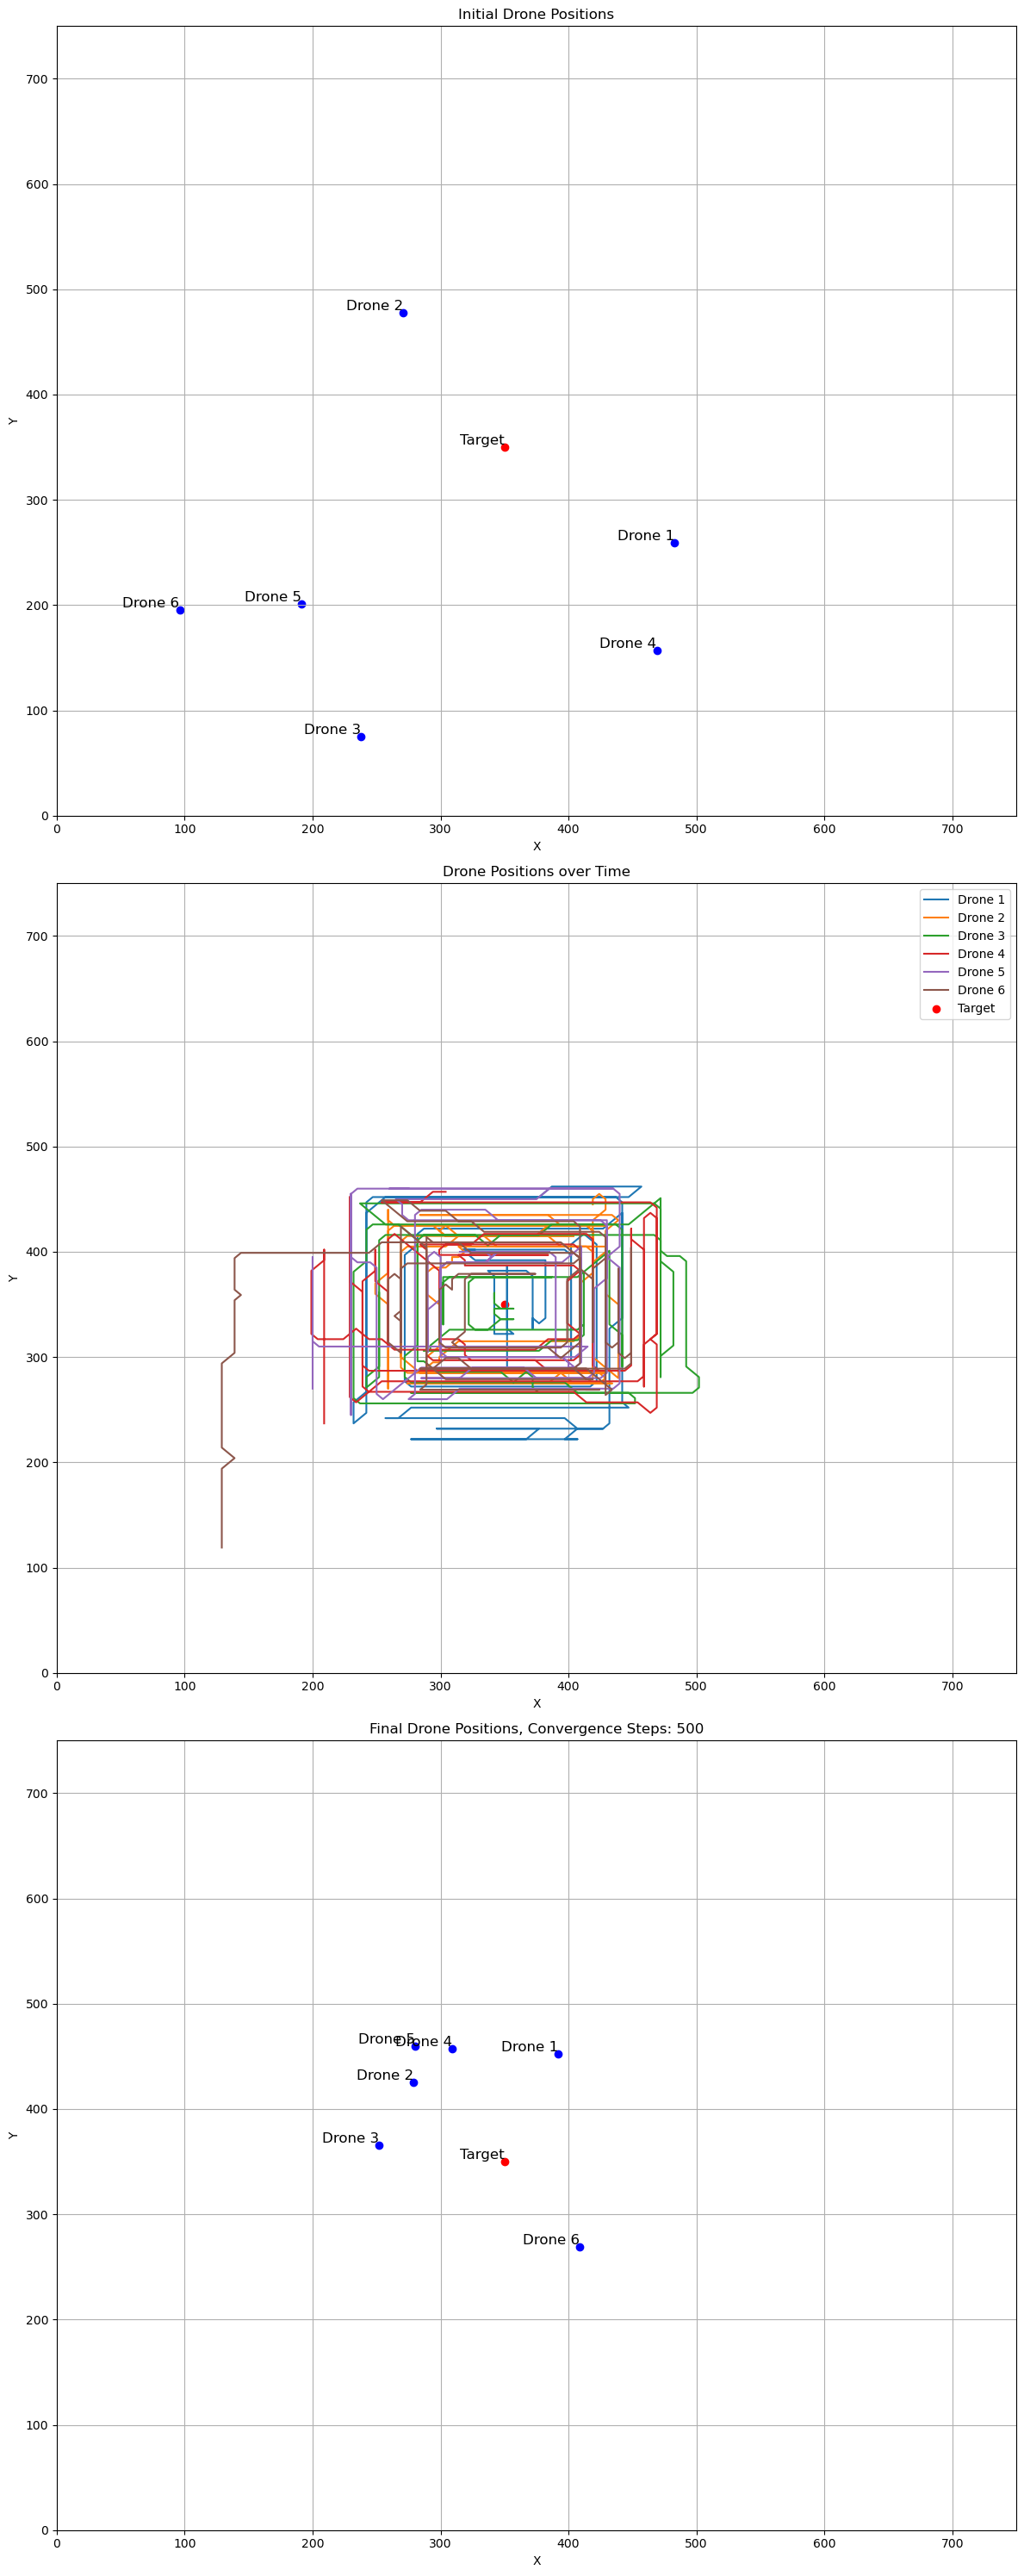

Initial Power [-80.57 -79.97 -85.87 -83.53 -83.19 -85.89]
Final Power [-77.27 -76.7  -76.36 -77.6  -78.73 -76.44]
Power Improvement [3.29 3.27 9.51 5.93 4.46 9.45]
Completion Steps:  500


In [301]:
# Number of drones (agents)
num_drones = 6
env = DroneEnv(num_drones)

# Training
obs = env.reset()
initial_drones_location = env.drones_location  # Initial drone positions

print('Initial LOCA Target Estimate: ', env.localization_est)
print('Initial LOCA Error (m): ', env.loca_err)
       
for _ in range(1000):
    actions = [env.choose_action(agent, env.convert_state_to_int(env.drones_location[agent])) for agent in range(num_drones)]
    #print("Actions:", actions)  # Add this line to print the actions chosen by each agent
    next_obs, rewards, done, _ = env.step(actions)
    for agent in range(num_drones):
        state = int(env.convert_state_to_int(env.drones_location[agent]))
       # print(f"Agent {agent + 1} state: {state}")  # Add this line to print the state
        action = actions[agent]
        next_state = env.convert_state_to_int(next_obs[agent])
        reward = rewards[agent]
        env.update_q_table(agent, state, action, reward, next_state)
    obs = next_obs
    if done:
        final_drones_location = env.drones_location

        break

initial_distances = np.linalg.norm(env.target_location - env.initial_loc, axis=1)

final_drones_location = env.drones_location  
final_distances = np.linalg.norm(env.target_location - env.drones_location, axis=1)
print("Initial Drone-to-Target Distances\n",initial_distances)
print("Final Drone-to-Target Distances\n",final_distances)
plot_locations(env.initial_loc, final_drones_location, env.target_location, env.current_step)

received_power_initial = -1 * 20 * np.log10((4 * np.pi * initial_distances * 5e9) / 3e8) + env.target_power
print("Initial Power",np.round(received_power_initial,2))
received_power_final = -1 * 20 * np.log10((4 * np.pi * final_distances * 5e9) / 3e8) + env.target_power
print("Final Power",np.round(received_power_final,2))
print("Power Improvement",np.round(received_power_final-received_power_initial,2))
print("Completion Steps: ", env.current_step)

In [23]:

# Plot initial and final positions
obs = env.reset()
initial_drones_location = env.drones_location  # Initial drone positions
#print(initial_drones_location)
for _ in range(100):
    actions = [env.choose_action(agent, env.convert_state_to_int(env.drones_location[agent])) for agent in range(num_drones)]
    obs, _, done, _ = env.step(actions)
    if done:
        final_drones_location = env.drones_location
        break

#plot_locations(initial_drones_location, final_drones_location, env.target_location)
